# R LAB GRADED ASSIGNMENT 2
## MSc in Business Analytics<br>
Athens University of Business and Economics<br>
Module: Statistics in Business Analytics 1<br>
Assignment created by Professor Stauros Nikolakopoulos(Department of Statistics, AUEB)<br>
Author: Ferdinand Tzimas

The data to be
used for this assignment can be found in the file Drugs.txt. It includes data published by OECD on
pharmaceutical drug spending by countries with indicators such as a share of total health spending, in
USD per capita (using economy-wide PPPs) and as a share of GDP. Plus, total spending by each country
in the specific year. The variables in the dataset are:<br>
Variable Name Description<br>
LOCATION Country code<br>
TIME Date (Year)<br>
PC HEALTHXP % of Health spending that is spent on pharmaceutical drugs<br>
PC GDP % of GDP that is spent on pharmaceutical drugs<br>
USD CAP USD per capita (using economy-wide PPPs) spent on pharmaceutical drugs<br>
TOTAL SPEND Total spending in millions USD<br>
Please complete the tasks below.

Load the data in an object named Drugs. You will notice there is an additional variable called
FLAG_CODES. Remove this variable from the dataset

In [3]:
#Q1
#LETS READ THE DATA AND GET RID OF THE EXTRA COLUMN NOT NEEDED
#for the code to run the Drugs.txt file must be in the same directory as this notebook
Drugs<- read.csv("Drugs.txt",header= T)
Drugs$FLAG_CODES <- NULL

How many countries are there? Make a table with the countries' acronyms and the number of
datapoints (years) per country, sorted in ascending order (the country with the least datapoints
appears first)

In [4]:
#Q2
#COUNTRIES SORTED BY NUMBER OF APPEARANCES IN THE DATASET
table(Drugs$LOCATION)[order(table(Drugs$LOCATION))]


RUS ISR TUR LTU LVA POL SVN USA EST MEX SVK LUX HUN NZL AUT CZE GRC ITA FRA CHE 
  1   8  11  12  12  14  14  16  17  17  17  21  22  24  26  26  27  29  30  31 
GBR ESP JPN DNK PRT BEL IRL NLD AUS CAN DEU FIN ISL SWE KOR NOR 
 31  32  32  36  39  41  41  43  44  45  45  46  46  46  47  47 

Make a selection of countries based on the number of datapoints available. Specifically, select the
countries that have a number of points in the top 25% of the distribution of number of datapoints,
thus representing the countries with the most information available.

In [7]:
#Q3
#COUNTRIES WITH MORE APPEARANCES THAN THE 75 PERCENTILE FOR APPEARANCES
q3<-table(Drugs$LOCATION)[order(table(Drugs$LOCATION))]
q3fin<-subset(Drugs$LOCATION,Drugs$LOCATION %in% names(q3[q3>quantile(q3,.75)]))
unique(q3fin)

[1] "AUS" "CAN" "FIN" "DEU" "ISL" "KOR" "NLD" "NOR" "SWE"

Using only the data selected in Q3, create a graph with 4 plots (in the same window). Each plot
should depict the development of the drug spending for all countries in the reduced dataset, over
the available years. Each graph should depict one of the metrics (metrics = variables measuring
drug spending in dierent ways, thus 4 metrics= 4 graphs). In each graph, a separate line should
represent a country. The legend should show which line represents each country. The main title of
each plot should mention "Drug spending in XX (type of metric)".Define the x-axis limits by the range found in the dataset, that is, smallest year found in the dataset up to
largest year found in the dataset.

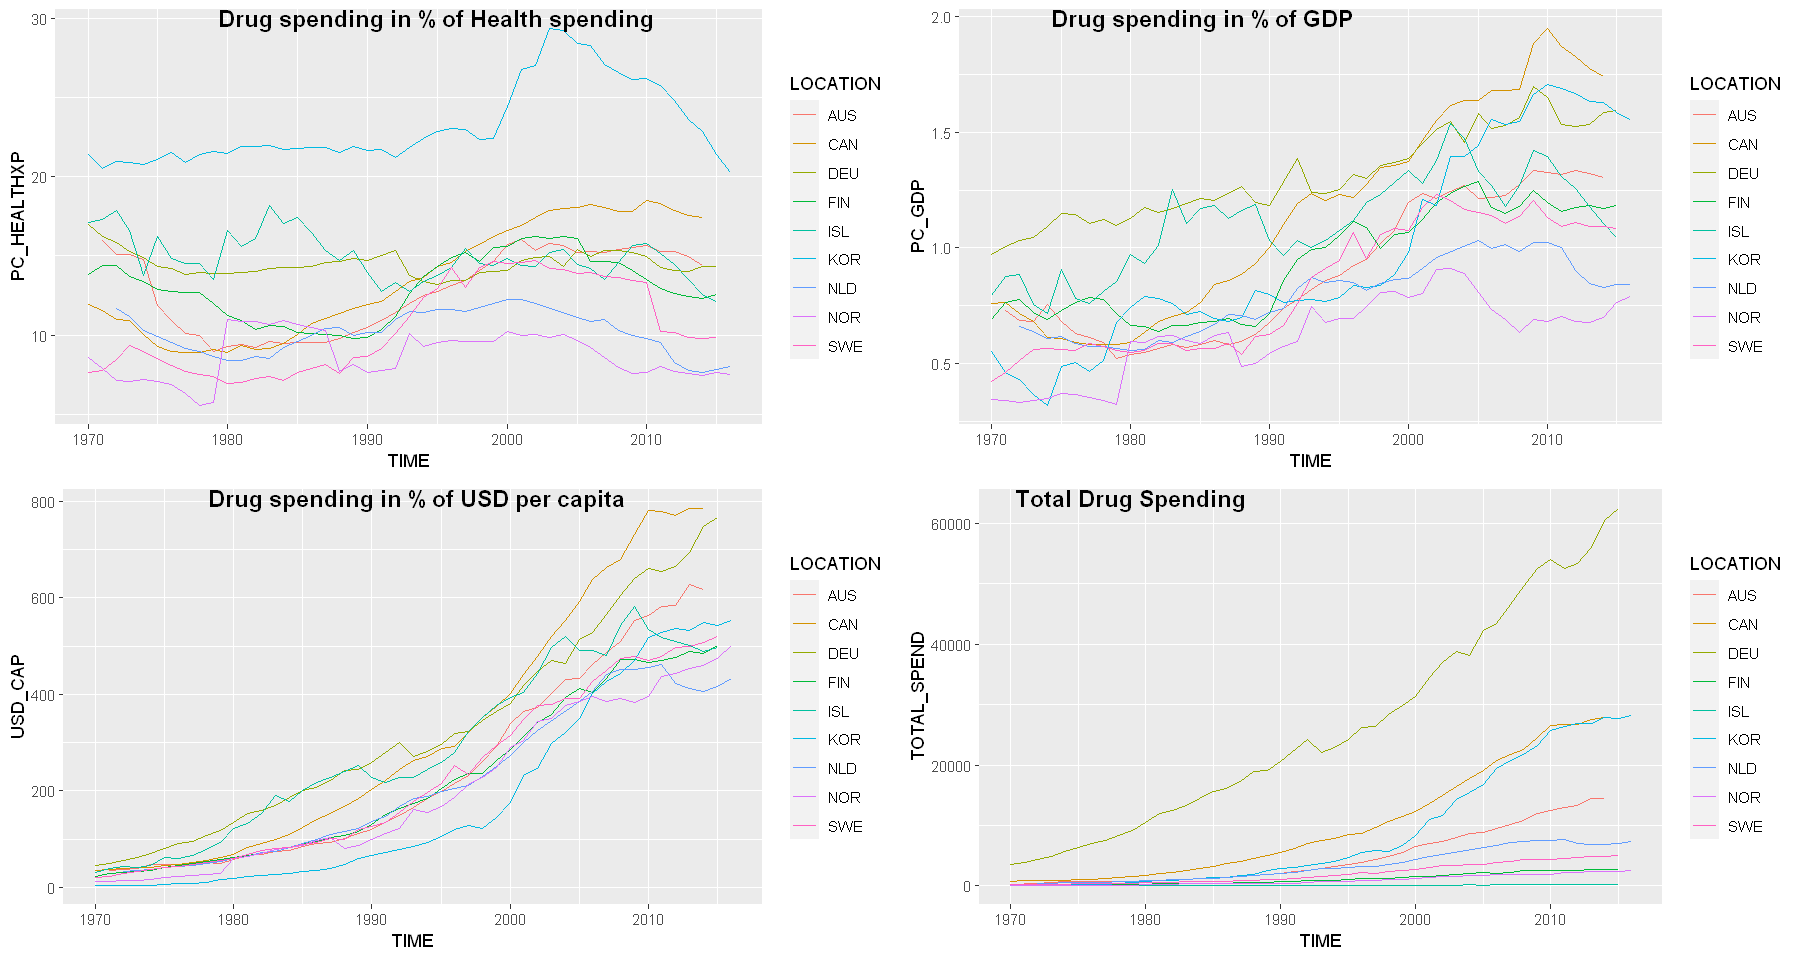

In [21]:
#Q4
#VISUALIZING EACH OF THE FOUR AVAILABLE METRICS THROUGHOUT THE AVAILABLE YEARS FOR THE COUNTRIES SHOWN IN QUESTION 3
q4<-Drugs[Drugs$LOCATION %in% unique(q3fin),]

library(ggplot2)
library(ggpubr)
g1<-ggplot(data = q4, aes(x=TIME, y=PC_HEALTHXP)) + geom_line(aes(colour=LOCATION)) + xlim(min(q4$TIME), max(q4$TIME))
g2<-ggplot(data = q4, aes(x=TIME, y=PC_GDP)) + geom_line(aes(colour=LOCATION)) + xlim(min(q4$TIME), max(q4$TIME))
g3<-ggplot(data = q4, aes(x=TIME, y=USD_CAP)) + geom_line(aes(colour=LOCATION)) + xlim(min(q4$TIME), max(q4$TIME))
g4<-ggplot(data = q4, aes(x=TIME, y=TOTAL_SPEND)) + geom_line(aes(colour=LOCATION)) + xlim(min(q4$TIME), max(q4$TIME))
ggarrange(g1, g2,g3,g4 ,labels = c("Drug spending in % of Health spending", "Drug spending in % of GDP", "Drug spending in % of USD per capita","Total Drug Spending"),ncol = 2, nrow = 2)
options(repr.plot.width=30, repr.plot.height=8)

Your client is a multinational pharmaceutical company. They are interested in the probability that
Belgium (BEL) will increase its drug expenditure in at least 4 of the 5 following consecutive years,
in order to assess the investing opportunities. Assume that we are at the year following the last
record for Belgium. Estimate the yearly probability of drug expenditure increase by the proportion
of years where the expenditure was higher than the year before (note: this is not an appropriate
way of estimating this probability, only use it for this assignment!).<br>
Create a list with the following elements, named accordingly:<br>
Data The data for Belgium<br>
Years The range (in years) of available data points for Belgium, a vector with two elements, the
minimum and maximum years<br>
Data.points The number of available data points for Belgium<br>
YearlyProbs The yearly probabilities of increase (probability of increase per year) in expenditure,
in all the four metrics available, thus a vector with 4 elements and names according to the metric<br>
FiveYeProbs The requested probabilities (probability of increase in at least 4 out of 5 consecutive
years) for all metrics, thus a vector with 4 elements and names according to the metric

In [10]:
#Q5
#FIRST WE CREATE A TABLE JUST FOR BELGIUM
Data<-Drugs[Drugs$LOCATION=="BEL",]

#FIRST AND LAST YEAR RECORDED FOR SAID COUNTRY
Years<-c(min(Data$TIME),max(Data$TIME))

#SINCE WE ANALYZE THE DIFFERENCE IN EXPENDITURE FROM ONE YEAR TO THE NEXT I NO LONGER CONSIDER EACH YEAR AS A DATAPOINT BUT RATHER EACH TRANSITION FROM ONE YEAR TO THE NEXT
Data.points<-length(Data$TIME)-1

#BASED ON THE QUESTION WE HYPOTHESIZE THAT EVERY EVENT IS,IDEALLY, INDEPENDENT FROM THE REST AND THAT THE NUMBER OF YEAR OVER YEAR INCREASES IN THE FOLLOWING METRICS BY THE TOTAL NUMBER OF TRANSITIONS TO THE FOLLOWING YEAR WILL GIVE US THE PROPABILITY OF THE EVENT OF A YEAR OVER YEAR INCREASE
#FOR HEALTHXP
db1<-Data[diff(Data$PC_HEALTHXP)>0,]$PC_HEALTHXP
db1<-tail(db1,length(db1)-1)#WE DONT COUNT THE FIRST YEAR
prob1<-length(db1)/(length(Data$PC_HEALTHXP)-1)

#FOR PC_GDP
db2<-Data[diff(Data$PC_GDP)>0,]$PC_GDP
db2<-tail(db2,length(db2)-1)
prob2<-length(db2)/(length(Data$PC_GDP)-1)

#FOR USD_CAP
db3<-Data[diff(Data$USD_CAP)>0,]$USD_CAP
db3<-tail(db3,length(db3)-1)
prob3<-length(db3)/(length(Data$USD_CAP)-1)

#FOR TOTAL_SPEND
db4<-Data[diff(Data$TOTAL_SPEND)>0,]$TOTAL_SPEND
db4<-tail(db4,length(db4)-1)
prob4<-length(db4)/(length(Data$TOTAL_SPEND)-1)


#SINCE WE HAVE THE PROPABILITY OF ONE SUCCESSFUL EVENT(YoY INCREASE) WE WILL CALCULATE THE SUM OF PROPABILITIES FOR 4 OR 5 SUCCESSFUL EVENTS IN 5 TOTAL TRIES(FOLLOWING YEARS) OF THE BINOMIAL DISTRIBUTION FOR EACH METRIC
FiveYeProbs_PC_HEALTHXP<- sum(dbinom(4:5,5,prob=prob1))
FiveYeProbs_PC_GDP<- sum(dbinom(4:5,5,prob=prob2))
FiveYeProbs_USD_CAP<- sum(dbinom(4:5,5,prob=prob3))
FiveYeProbs_TOTAL_SPEND<- sum(dbinom(4:5,5,prob=prob4))

#WELL CREATE THE TWO REQUESTED PROPABILITY VECTORS AND ADD NAMES RESPECTIVE TO THEIR METRICS
thenames<-c('PC_HEALTHXP','PC_GDP','USD_CAP','TOTAL_SPEND')

YearlyProbs<-c(prob1,prob2,prob3,prob4)
FiveYeProbs<-c(FiveYeProbs_PC_HEALTHXP,FiveYeProbs_PC_GDP,FiveYeProbs_USD_CAP,FiveYeProbs_TOTAL_SPEND)

names(YearlyProbs)<-thenames
names(FiveYeProbs)<-thenames
#LETS CREATE THE LIST REQUESTED BY OUR CUSTOMER
q5<-list(Data,Years,Data.points,YearlyProbs,FiveYeProbs)
q5

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
71,BEL,1970,28.113,1.078,41.918,404.74
72,BEL,1971,28.275,1.109,46.908,453.75
73,BEL,1972,27.629,1.126,52.105,506.00
74,BEL,1973,27.547,1.200,61.916,603.17
75,BEL,1974,26.779,1.183,69.147,675.73
76,BEL,1975,21.886,1.208,75.852,743.40
77,BEL,1976,18.880,1.081,75.524,741.51
78,BEL,1977,18.301,1.133,84.525,830.91
79,BEL,1978,17.789,1.135,93.107,916.13


Your client asks for a function that can calculate the above probabilities for a variable amount of
years and for any country desired. Create a function, that it will take as arguments (and default
values):<br>
DATA=NULL Data in the same form as the country-specific dataset (without the FLAG CODES
variable). Attention: The data input for this function should consist of data concerning one
country only (as you did in the previous question with Belgium).<br>
METRIC="pc.gdp" The metric in which the required probability needs to be reported. Possible
values should be "pc.gdp" (% of GDP), "pc.tot" (% of total health expenditure), "per.ca"
(absolute expenditure per capita), and "total" (total absolute spending).<br>
nofY=5 The number of following consecutive years that the probability needs to be estimated.
Every time the probability estimated should be of the form "The probability of increasing drug
expenditure in at least nofY-1 out of the following nofY years".<br>
The outcome of the function should be a sentence of the form:<br>
"Based on (XX) datapoints from years (minYear) to (maxYear), the probability that
(countrycode) will increase its drug expenditure, in terms of (metric chosen), in at
least (nofY-1) years in the period (maxYear+1) to (maxYear+1+nofY) is (estimated
probability)".<br>
If the number of available datapoints for the calculation of the yearly increase probability is less than
10 (thus, less than 11 years of data), the function should return : "Unable to calculate probability (n<
10)", without any other output.

In [11]:
#Q6
#THE FUNCTION RETURNS THE LIST OF QUESTION 5 FOR ANY COUNTRY,METRIC AND NUMBER OF YEARS
q6 <-function(DATA=NULL,METRIC="pc.gdp",nofY=5){
     if((length(Data$TIME)-1) <10){
        print("Unable to calculate probability (n<10)")
       }else{
         if (METRIC=="pc.gdp"){
           metr<-DATA$PC_GDP
         }else if (METRIC=="pc.tot"){
           metr<-DATA$PC_HEALTHXP
         }else if (METRIC=="per.ca"){
           metr<-DATA$USD_CAP
         }else{
           metr<-DATA$TOTAL_SPEND
         }
    
         db<-metr[diff(metr)>0]
         db<-tail(db,length(db)-1)
         proba<-length(db)/(length(metr)-1)
         Yyearproba<-sum(dbinom((nofY-1):nofY,nofY,prob=proba))
    
         paste(c("Based on ",(length(DATA$TIME)-1)," datapoints from years ",(min(DATA$TIME))," to ",(max(DATA$TIME)),", the probability that ",(unique(DATA$LOCATION))," will increase its drug expenditure, in terms of ",(METRIC),",in at least ",(nofY-1)," years in the period ",(max(DATA$TIME)+1)," to ",(max(DATA$TIME)+1+nofY)," is ",(Yyearproba),"."),collapse="") 
       }
}    

#LETS TRY IT FOR BELGIUM AGAIN AND CROSS CHECK
q6(Data,"pc.tot",5)
q6(Data,,5)
q6(Data,"per.ca")
q6(Data,"pc.total",5)
#THE NUMBERS ARE CORRECT

#LETS TRY FOR FINLAND WITH A DIFFERENT METRIC AND NUMBER OF YEARS
EXPER<-Drugs[Drugs$LOCATION=="FIN",]
q6(EXPER,"pc.gdp",10)


[1] "Based on 40 datapoints from years 1970 to 2015, the probability that BEL will increase its drug expenditure, in terms of pc.tot,in at least 4 years in the period 2016 to 2021 is 0.0540225."

[1] "Based on 40 datapoints from years 1970 to 2015, the probability that BEL will increase its drug expenditure, in terms of pc.gdp,in at least 4 years in the period 2016 to 2021 is 0.2203105078125."

[1] "Based on 40 datapoints from years 1970 to 2015, the probability that BEL will increase its drug expenditure, in terms of per.ca,in at least 4 years in the period 2016 to 2021 is 0.91854."

[1] "Based on 40 datapoints from years 1970 to 2015, the probability that BEL will increase its drug expenditure, in terms of pc.total,in at least 4 years in the period 2016 to 2021 is 0.9517223828125."

[1] "Based on 45 datapoints from years 1970 to 2015, the probability that FIN will increase its drug expenditure, in terms of pc.gdp,in at least 9 years in the period 2016 to 2026 is 0.0615123522076747."